In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


## Checking for the Null values

In [4]:
df.isnull().sum()


age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

## Checking if all the Data in the right format

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


## Cliping the Outliers

In [6]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [7]:
iqr = df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
lower_threshold = df['dur'].quantile(0.25) - (1.5*iqr)
upper_threshold = df['dur'].quantile(0.75) + (1.5*iqr)
print(lower_threshold, upper_threshold)
df['dur'] = df['dur'].clip(lower_threshold, upper_threshold)

-221.0 643.0


In [8]:
iqr = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
lower_threshold = df['num_calls'].quantile(0.25) - (1.5*iqr)
upper_threshold = df['num_calls'].quantile(0.75) + (1.5*iqr)
print(lower_threshold, upper_threshold)
df['num_calls'] = df['num_calls'].clip(lower_threshold, upper_threshold)

-2.0 6.0


In [9]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,234.939307,2.392228
std,10.618762,8.322476,176.749932,1.600111
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,643.000000,6.000000


### Droping the Duplicates in the data

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(45195, 11)

### Checking if the data is a balanced Data or Not

In [12]:
df.y.value_counts()

no     39908
yes     5287
Name: y, dtype: int64

<AxesSubplot: xlabel='y', ylabel='count'>

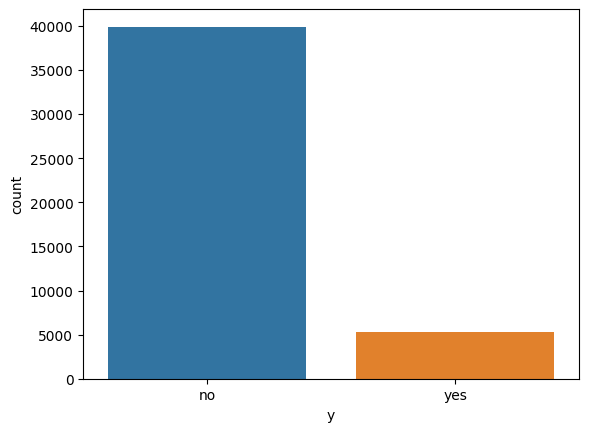

In [13]:
sns.countplot(data=df,x='y')


In [14]:
# Encoding the target variable
df['y'] = df['y'].map({'no':0,'yes':1})

C:\Users\USER\AppData\Local\Temp\ipykernel_10532\825572093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'no':0,'yes':1})


In [15]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [16]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [17]:
df['job'].value_counts()

blue-collar      9728
management       9455
technician       7593
admin.           5170
services         4152
retired          2263
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: job, dtype: int64

In [18]:
# Encoding the 'Job' columns based on the value counts or Mode
df['job'] = df['job'].replace({'unknown':'blue-collar'})

C:\Users\USER\AppData\Local\Temp\ipykernel_10532\2593997889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].replace({'unknown':'blue-collar'})


In [19]:
df['job'].value_counts()

blue-collar      10016
management        9455
technician        7593
admin.            5170
services          4152
retired           2263
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            937
Name: job, dtype: int64

In [20]:
df['marital'].value_counts()

married     27204
single      12784
divorced     5207
Name: marital, dtype: int64

In [21]:
df['education_qual'].value_counts()

secondary    23192
tertiary     13296
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [22]:
# Encoding the 'education_qual' columns based on the value counts or Mode
df['education_qual'] = df['education_qual'].replace({'unknown':'secondary'})

C:\Users\USER\AppData\Local\Temp\ipykernel_10532\3829706993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual'] = df['education_qual'].replace({'unknown':'secondary'})


In [23]:
df['education_qual'].value_counts()

secondary    25049
tertiary     13296
primary       6850
Name: education_qual, dtype: int64

In [24]:
df['call_type'].value_counts()

cellular     29277
unknown      13012
telephone     2906
Name: call_type, dtype: int64

In [25]:
df['mon'].value_counts()

may    13762
jul     6892
aug     6243
jun     5337
nov     3969
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [26]:
df['prev_outcome'].value_counts()

unknown    36943
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

## Exploratory Data Analysis

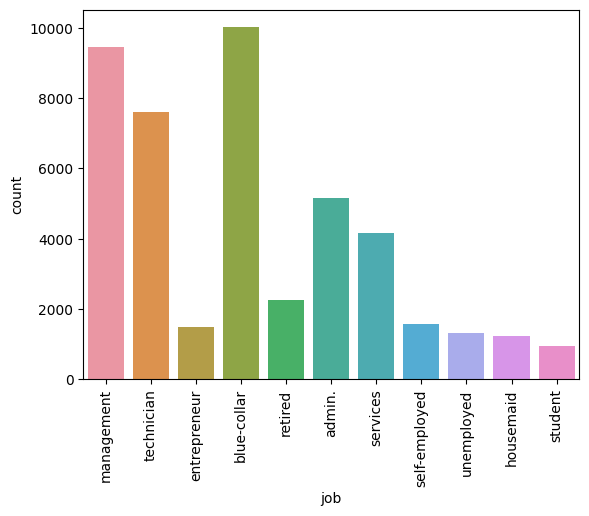

In [27]:
ax = sns.countplot(data=df,x='job')
ax.tick_params(axis='x',rotation=90)

<AxesSubplot: ylabel='job'>

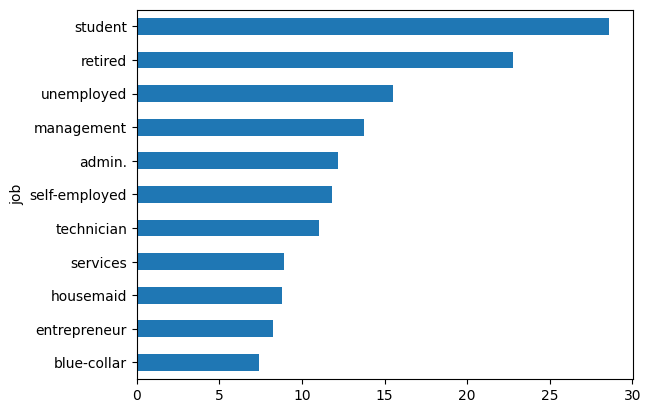

In [28]:
(df.groupby('job')['y'].mean()*100).sort_values().plot(kind='barh')

### By just plotting the job column based on the target varibale  we can see that  most subscribed customers are Students

<AxesSubplot: ylabel='marital'>

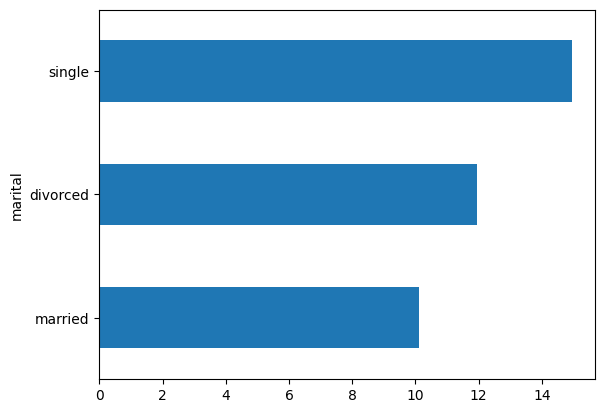

In [29]:
(df.groupby('marital')['y'].mean()*100).sort_values().plot(kind='barh')

### Single people are the most subscribed customers

<AxesSubplot: ylabel='education_qual'>

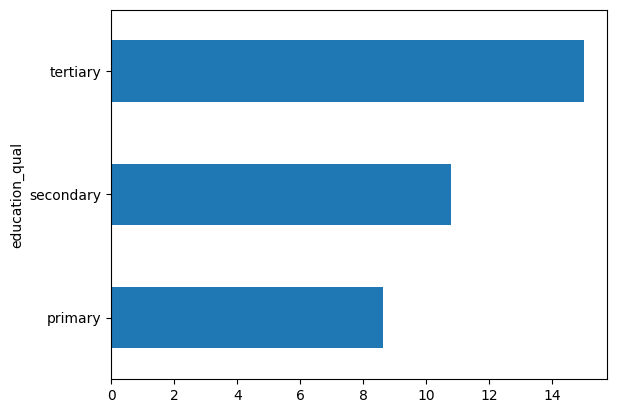

In [30]:
(df.groupby('education_qual')['y'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot: ylabel='call_type'>

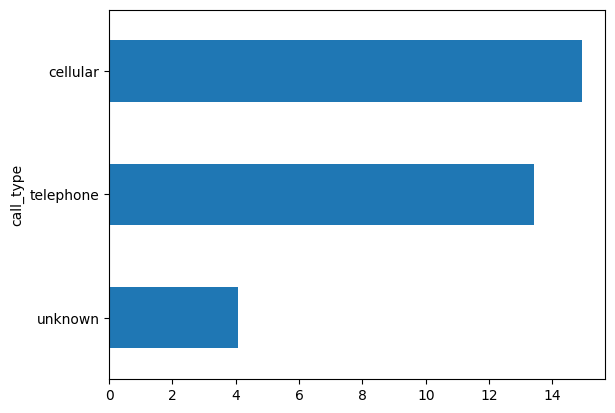

In [31]:
(df.groupby('call_type')['y'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot: ylabel='mon'>

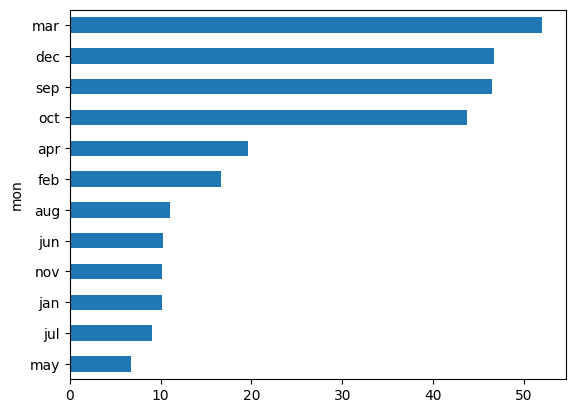

In [32]:
(df.groupby('mon')['y'].mean()*100).sort_values().plot(kind='barh')

### The sales of insurance happend in march because it is the financial year

<AxesSubplot: ylabel='prev_outcome'>

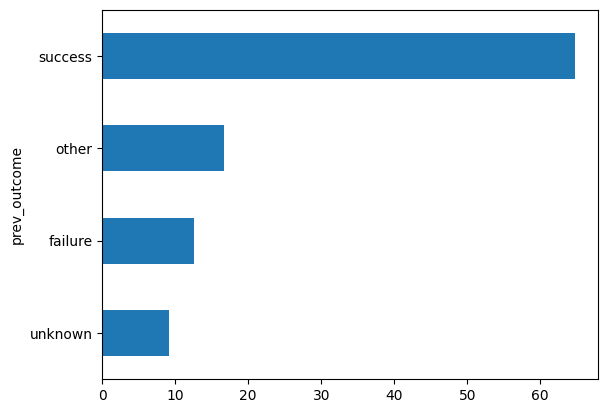

In [33]:
(df.groupby('prev_outcome')['y'].mean()*100).sort_values().plot(kind='barh')

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

<AxesSubplot: xlabel='y', ylabel='age'>

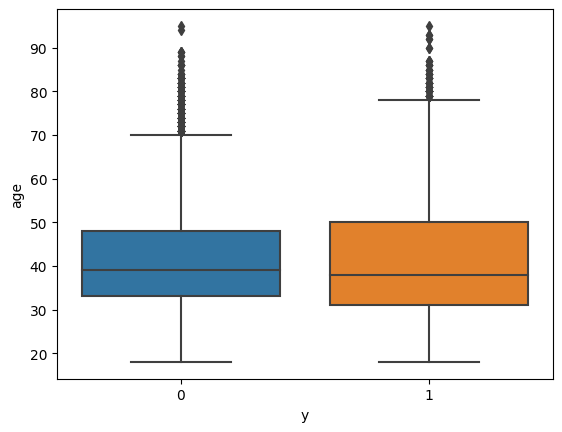

In [35]:
sns.boxplot(df,x='y',y='age')

## Encoding the Data

In [36]:
df['job'] = df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,
                           'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})
df['marital'] = df['marital'].map({'married':0,'single':2, 'divorced':1})
df['education_qual'] = df['education_qual'].map({'secondary':1,'tertiary':2,'primary':0})
df['call_type'] = df['call_type'].map({'cellular':2,'unknown':0,'telephone':1})
df['mon'] = df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})

C:\Users\USER\AppData\Local\Temp\ipykernel_10532\2790206024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,
C:\Users\USER\AppData\Local\Temp\ipykernel_10532\2790206024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital'] = df['marital'].map({'married':0,'single':2, 'divorced':1})
C:\Users\USER\AppData\Local\Temp\ipykernel_10532\2790206024.py:4: SettingWithCopyWarning: 
A 

In [37]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,643,3,0,1
45207,71,9,1,0,2,17,3,456,2,0,1
45208,72,9,0,1,2,17,3,643,5,3,1
45209,57,0,0,1,1,17,3,508,4,0,0


In [38]:
x = df.drop(['y'],axis=1)
y = df['y']

In [39]:
x

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58,7,0,2,0,5,0,261,1,0
1,44,4,2,1,0,5,0,151,1,0
2,33,1,0,1,0,5,0,76,1,0
3,47,0,0,1,0,5,0,92,1,0
4,33,0,2,1,0,5,0,198,1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,643,3,0
45207,71,9,1,0,2,17,3,456,2,0
45208,72,9,0,1,2,17,3,643,5,3
45209,57,0,0,1,1,17,3,508,4,0


## Spliting the data

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score

In [41]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Balancing the data

In [42]:
from imblearn.combine import SMOTEENN

smote = SMOTEENN(sampling_strategy='all')
X_train,y_train = smote.fit_resample(X_train,y_train)

In [43]:
X_train.shape, X_test.shape

((53650, 10), (9039, 10))

### Model fitting 

In [44]:
from sklearn.model_selection import cross_val_score 
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train, y_train) 
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
    dt = DecisionTreeClassifier(max_depth=depth) 
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    roc = roc_auc_score(y_test,y_pred)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy,"ROC AUC Score :", roc, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7833737185461324 ROC AUC Score : 0.7184408266738196  Cross val score :  0.7833737185461324
Depth  :  2  Training Accuracy :  0.8021994408201305 ROC AUC Score : 0.7176166557794853  Cross val score :  0.8021994408201305
Depth  :  3  Training Accuracy :  0.8576887232059646 ROC AUC Score : 0.782925936016  Cross val score :  0.8576887232059647
Depth  :  4  Training Accuracy :  0.8643243243243244 ROC AUC Score : 0.7883364146037536  Cross val score :  0.8639701770736254
Depth  :  5  Training Accuracy :  0.8791985088536812 ROC AUC Score : 0.8078918587110306  Cross val score :  0.8769058713886301
Depth  :  6  Training Accuracy :  0.8921155638397018 ROC AUC Score : 0.8101873721591272  Cross val score :  0.8887604846225535
Depth  :  7  Training Accuracy :  0.9107921714818267 ROC AUC Score : 0.8244688449885212  Cross val score :  0.9039701770736255
Depth  :  8  Training Accuracy :  0.9221062441752097 ROC AUC Score : 0.8289375221831662  Cross val score :  0.91397

In [45]:
tree = DecisionTreeClassifier(max_depth=9)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9330102516309413
Testing Accuracy : 0.7860382785706383
F1 Score : 0.4953027139874739
ROC AUC Score : 0.8268018207499968


In [46]:
tree = RandomForestClassifier(n_estimators=100,max_depth=6, max_features='sqrt')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9103448275862069
Testing Accuracy : 0.7473171811041044
F1 Score : 0.4663551401869159
ROC AUC Score : 0.8244694276061477


In [47]:
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
    model.fit(X_train,y_train) 
    model.score(X_test, y_test) 
    y_pred = model.predict(X_test)
    print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train),"ROC AUC Score :", roc_auc_score(y_test,y_pred), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.9187698042870457 ROC AUC Score : 0.8288508286803549  Cross-Val score :  0.9169058713886299
Learning rate :  0.02  Train score :  0.9283690587138863 ROC AUC Score : 0.8356389066457794  Cross-Val score :  0.9252003727865798
Learning rate :  0.03  Train score :  0.9344641192917055 ROC AUC Score : 0.8373780202606445  Cross-Val score :  0.931071761416589
Learning rate :  0.04  Train score :  0.9387698042870457 ROC AUC Score : 0.8398516399171377  Cross-Val score :  0.9339422180801492
Learning rate :  0.05  Train score :  0.9412488350419385 ROC AUC Score : 0.8445332055924767  Cross-Val score :  0.9366262814538677
Learning rate :  0.06  Train score :  0.9456849953401677 ROC AUC Score : 0.844552373712386  Cross-Val score :  0.939888164026095
Learning rate :  0.07  Train score :  0.9496738117427772 ROC AUC Score : 0.8458857524122119  Cross-Val score :  0.943429636533085
Learning rate :  0.08  Train score :  0.9526374650512581 ROC AUC Score : 0.847045161488

In [48]:
tree = XGBClassifier(learning_rate = 0.2, n_estimators=100, verbosity = 0)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9696551724137931
Testing Accuracy : 0.8311760150459122
F1 Score : 0.554322429906542
ROC AUC Score : 0.8524267422422716


In [49]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).reset_index()

In [50]:
df2.drop('index',axis=1,inplace=True)

In [51]:
df2

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,0,0
4,0,0
...,...,...
9034,0,0
9035,0,0
9036,0,0
9037,0,0
